In [1]:
import numpy as np
import re
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
data = np.load('matched_phone_complete.npy', allow_pickle = True)

In [3]:
data[1]

{'main_category': 'Cell Phones & Accessories',
 'title': 'Samsung Galaxy S20+ 5G, US Version, 128GB, Cosmic Gray for GSM (Renewed)',
 'average_rating': 4.0,
 'rating_number': 69,
 'features': ['This phone is compatible with carriers on the GSM network (e.g. AT&T, T-Mobile, Metro).',
  'Please check with your carrier to verify compatibility.',
  'When you receive the phone, insert a SIM card from a compatible carrier. Then, turn it on, connect to Wi-Fi, and follow the on screen prompts to activate service.',
  'The device does not come with headphones or a SIM card. It does include a charger and charging cable that may be generic.',
  'Tested for battery health and guaranteed to have a minimum battery capacity of 80%.'],
 'description': ['This pre-owned or refurbished product has been professionally inspected and tested to work and look like new. How a product becomes part of Amazon Renewed, your destination for pre-owned, refurbished products: A customer buys a new product and returns 

In [3]:
def concatenate_text(data):
  review_texts = "".join(review['text'] for review in data['reviews'])
  return review_texts

In [4]:
def clean_review(text):
  text = re.sub(r'[^\x00-\x7F]+', '', text)
  text = re.sub(r'[\[\(\<].*?[\]\)\>]', '', text)
  return text

In [5]:
reviews = [{'review': clean_review(concatenate_text(product))} for product in data]

In [15]:
reviews[1]

{'review': 'I love the Samsung Galaxy line of phones and the S20+ is their best yet!  The only bummer is the seller sent me a dysfunctional phone at first  then the replacement they sent me was completely scratched up on the top and bottom! :That being said Im ranked top ten thousand in the world on multiple mobile gaming platforms. I push my phone to the very max and it doesnt flinch! I can have asphalt 8 mobile stremed on my tv while using a bluetooth PS remote and so im using the phone as a console wirelessly and still my phone doesnt even hesitate. Granted im running good guardians app so i can push the threshold and max out my CPU but any civilian with google can do the same thing and enjoy the best phone out their. Tbh the new s21+ and s22+ do not even have 4k screens and so i wouldnt even consider them! For me the Ultra is way overpriced because this phone does everything i need it to and even exceeds my expectations on so many other levels if i were to write about all the accol

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [7]:
review_features = model.encode(reviews)

In [8]:
review_features.shape

(438, 384)

In [9]:
np.save("matched_review_features.npy", review_features, allow_pickle=True)

In [10]:
brand = np.array([product['matched_specs']['phone_brand'] for product in data])
os = np.array([product['matched_specs']['os'] for product in data])
battery = np.array([product['matched_specs']['battery'] for product in data])
chipset = np.array([product['matched_specs']['chipset'] for product in data])
cpu = np.array([product['matched_specs']['cpu'] for product in data])
gpu = np.array([product['matched_specs']['gpu'] for product in data])
ram = np.array([product['matched_specs']['ram'] for product in data])
weight = np.array([product['matched_specs']['weight'] for product in data])
display_size = np.array([product['matched_specs']['display_size'] for product in data])

In [11]:
features = np.column_stack((brand, os, battery, chipset, cpu, gpu, ram, weight, display_size, review_features))

In [16]:
df = pd.DataFrame(features)
print(df)

         0                                                  1     2    \
0    samsung   Android 10, upgradable to Android 13, One UI 5.1  4000   
1    samsung   Android 10, upgradable to Android 13, One UI 5.1  4000   
2     xiaomi                                Android 11, MIUI 13  5000   
3    samsung  Android 12, up to 4 major Android upgrades, On...  5000   
4      apple                     iOS 14.1, upgradable to iOS 18  2227   
..       ...                                                ...   ...   
433  samsung  Android 13, up to 4 major Android upgrades, On...  5000   
434  oneplus  Android 12, upgradable to Android 14, OxygenOS...  5000   
435  samsung   Android 11, upgradable to Android 14, One UI 6.1  4500   
436  samsung  Android 13, upgradable to Android 14, One UI C...  5000   
437     asus               Android 11, upgradable to Android 13  4000   

                                           3    \
0                  Exynos 990 (7 nm+) - Global   
1                  Exyn

In [17]:
encoded_categorical = pd.get_dummies(df.iloc[:, 0:6])
numerical = df.iloc[:, 6:]
combined_data = pd.concat([numerical, encoded_categorical], axis=1)
combined_data= combined_data.rename(str,axis="columns")
numerical_data = combined_data.to_numpy()

In [20]:
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(numerical_data)
labels = kmeans.labels_

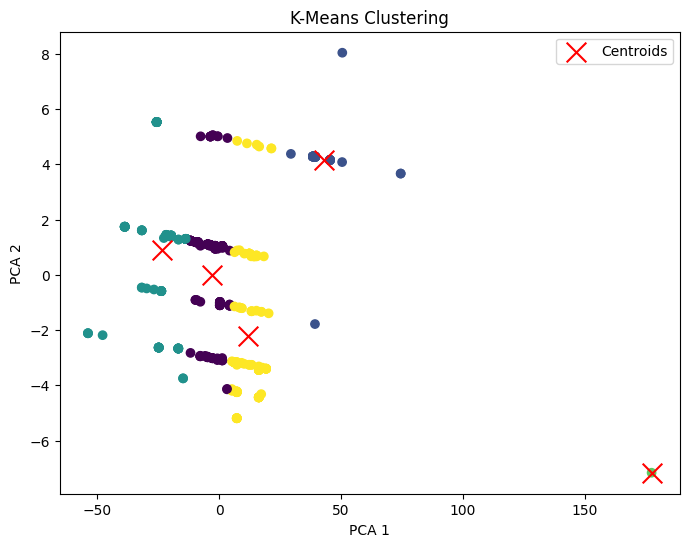

In [22]:
pca2 = PCA(n_components=2)
reduced_features = pca2.fit_transform(numerical_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')

centroids = pca2.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()